In [1]:
import sys

# Replace this with the path to the repository
sys.path.append("/home/zhenhao/ETFMH/")

In [2]:
from db_sketching.genome_selection import GenomeFiltering
from db_sketching.kmer_set import KMerSet, FracMinHash


def cond(kmer_hash):
    hash = (976369 * kmer_hash + 1982627) % 10000
    if hash < 100:
        return True
    else:
        return False

kmer_set = FracMinHash(cond, 12, True)
gf = GenomeFiltering(kmer_set)

In [3]:
from glob import glob

for f in glob("../Escherichia_data/*/*.fna"):
    gf.insert_genome(f)
    print(f)

../Escherichia_data/Escherichia sp005843885/GCA_004211985.1.fna
../Escherichia_data/Escherichia sp005843885/GCA_004745395.1.fna
../Escherichia_data/Escherichia sp005843885/GCA_005781075.1.fna
../Escherichia_data/Escherichia sp005843885/GCA_004212225.1.fna
../Escherichia_data/Escherichia sp005843885/GCA_004745255.1.fna
../Escherichia_data/Escherichia sp005843885/GCA_005781135.1.fna
../Escherichia_data/Escherichia sp005843885/GCA_004745185.1.fna
../Escherichia_data/Escherichia sp005843885/GCA_005781255.1.fna
../Escherichia_data/Escherichia sp005843885/GCA_005843885.1.fna
../Escherichia_data/Escherichia sp005843885/GCA_004211995.1.fna
../Escherichia_data/Escherichia coli_E/GCA_023276905.1.fna
../Escherichia_data/Escherichia coli_E/GCA_011881725.1.fna
../Escherichia_data/Escherichia whittamii/GCA_020283705.1.fna
../Escherichia_data/Escherichia whittamii/GCA_014836715.1.fna
../Escherichia_data/Escherichia whittamii/GCA_002965485.1.fna
../Escherichia_data/Escherichia whittamii/GCA_001660175.

In [8]:
import numpy as np

genome_list = list(gf.genome_dict.keys())
distance_matrix = np.zeros((len(genome_list), len(genome_list)))
for i in range(len(genome_list)):
    print(i)
    for j in range(i+1, len(genome_list)):
        distance = gf.genome_dict[genome_list[i]].resemblence(gf.genome_dict[genome_list[j]])
        distance_matrix[i][j] = distance_matrix[j][i] = distance

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


<Axes: >

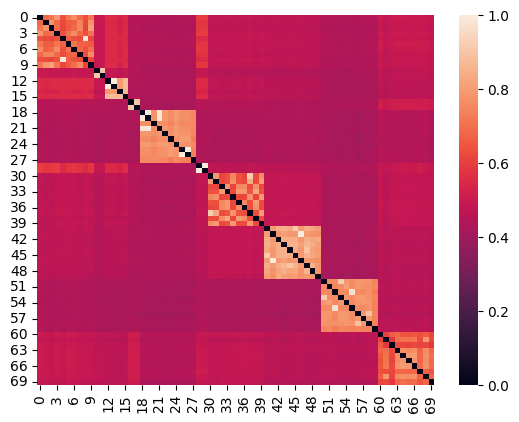

In [10]:
import seaborn

seaborn.heatmap(distance_matrix)

In [12]:
gf.genome_dict["genome_file_name"].resemblence(gf.genome_dict["genome_file_name"])

1.0